In [1]:
!pip install yfinance pandas matplotlib seaborn fredapi python-dotenv

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import sys
sys.path.append('../src')

from data_fetcher import DataFetcher

fetcher = DataFetcher(start_date='2010-01-01')
df = fetcher.fetch_all_data()

# Dosyayı kaydet
df.to_csv('../data/bist_analysis_data.csv')
print(f"Data saved! Shape: {df.shape}")

df.head()

Fetching BIST 100 data...
Fetching USD/TRY data...
Fetching US CPI data...
Data fetched successfully! Shape: (4172, 5)
Data saved! Shape: (4172, 5)


,BIST_TRY,USDTRY,CPI,BIST_USD,BIST_USD_Real
Date,,,,,
2010-01-04,533.679199,1.4731,217.488,362.283089,362.283089
2010-01-05,541.148132,1.4727,217.488,367.453067,367.453067
2010-01-06,545.471130,1.4714,217.488,370.715728,370.715728
2010-01-07,549.726074,1.4715,217.488,373.582100,373.582100
2010-01-08,547.976074,1.4580,217.488,375.840943,375.840943


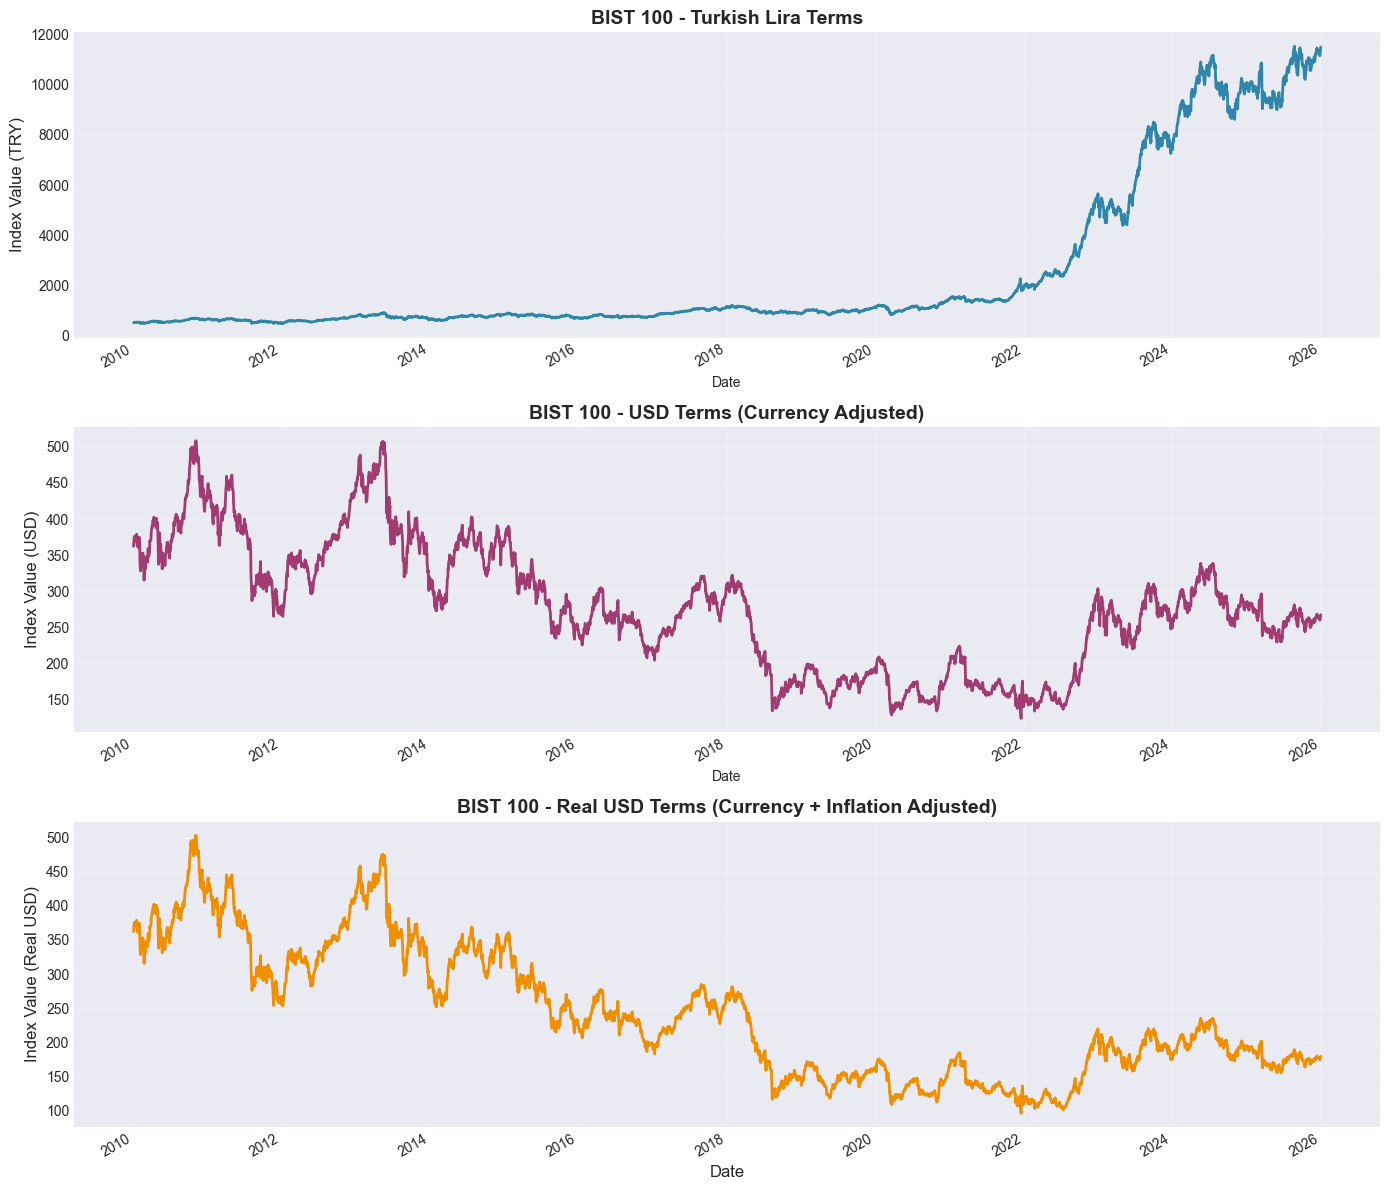

Chart saved to outputs/bist_three_perspectives.png


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


fig, axes = plt.subplots(3, 1, figsize=(14, 12))

df['BIST_TRY'].plot(ax=axes[0], color='#2E86AB', linewidth=2)
axes[0].set_title('BIST 100 - Turkish Lira Terms', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Index Value (TRY)', fontsize=12)
axes[0].grid(True, alpha=0.3)

df['BIST_USD'].plot(ax=axes[1], color='#A23B72', linewidth=2)
axes[1].set_title('BIST 100 - USD Terms (Currency Adjusted)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Index Value (USD)', fontsize=12)
axes[1].grid(True, alpha=0.3)

df['BIST_USD_Real'].plot(ax=axes[2], color='#F18F01', linewidth=2)
axes[2].set_title('BIST 100 - Real USD Terms (Currency + Inflation Adjusted)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Index Value (Real USD)', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/bist_three_perspectives.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved to outputs/bist_three_perspectives.png")

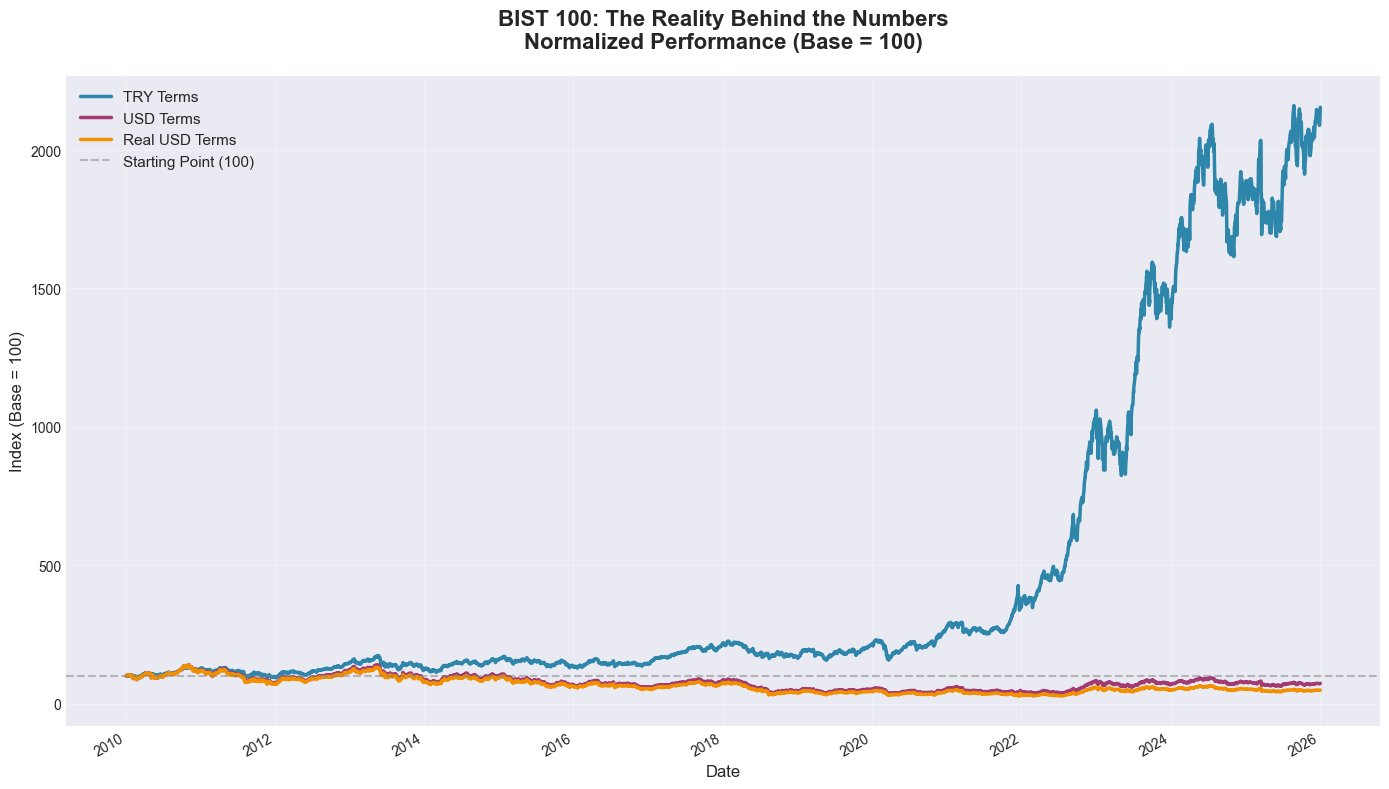

Normalized comparison saved!


In [10]:
fig, ax = plt.subplots(figsize=(14, 8))

normalized_df = df[['BIST_TRY', 'BIST_USD', 'BIST_USD_Real']].div(df[['BIST_TRY', 'BIST_USD', 'BIST_USD_Real']].iloc[0]) * 100

normalized_df['BIST_TRY'].plot(ax=ax, label='TRY Terms', linewidth=2.5, color='#2E86AB')
normalized_df['BIST_USD'].plot(ax=ax, label='USD Terms', linewidth=2.5, color='#A23B72')
normalized_df['BIST_USD_Real'].plot(ax=ax, label='Real USD Terms', linewidth=2.5, color='#F18F01')

ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5, label='Starting Point (100)')
ax.set_title('BIST 100: The Reality Behind the Numbers\nNormalized Performance (Base = 100)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Index (Base = 100)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/bist_normalized_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Normalized comparison saved!")

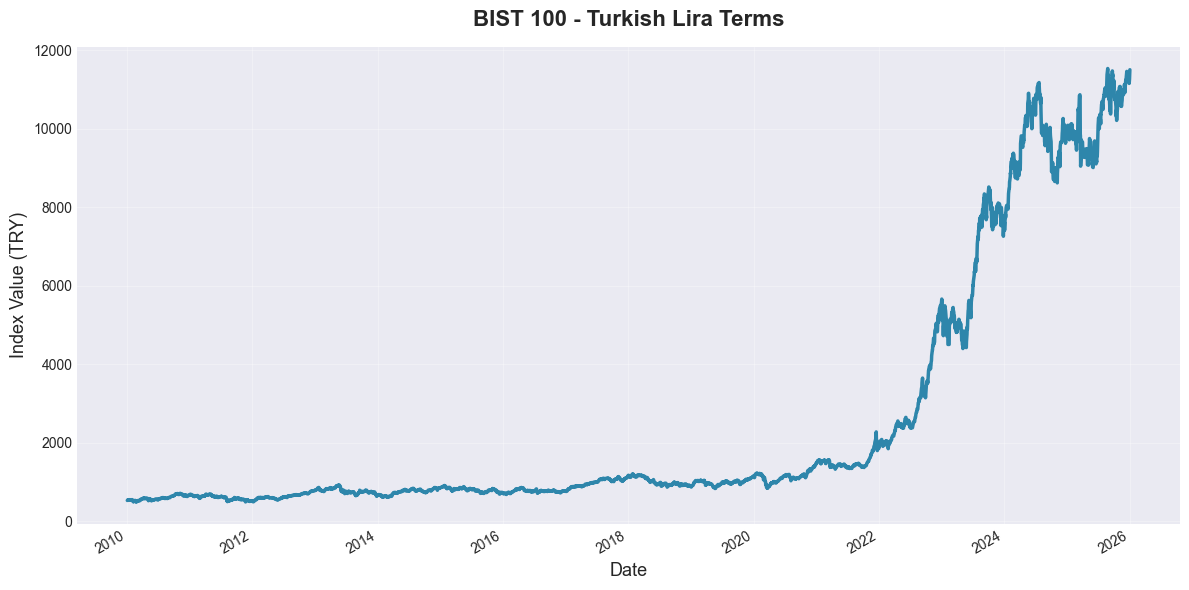

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
df['BIST_TRY'].plot(ax=ax, color='#2E86AB', linewidth=2.5)
ax.set_title('BIST 100 - Turkish Lira Terms', fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Index Value (TRY)', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/bist_try_terms.png', dpi=300, bbox_inches='tight')
plt.show()

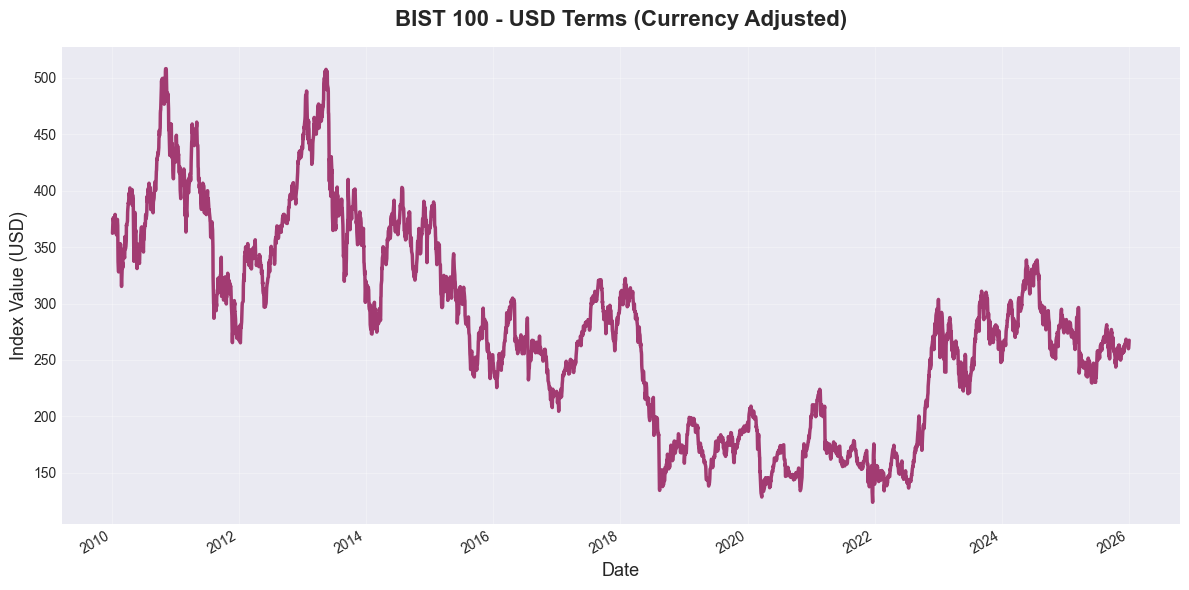

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
df['BIST_USD'].plot(ax=ax, color='#A23B72', linewidth=2.5)
ax.set_title('BIST 100 - USD Terms (Currency Adjusted)', fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Index Value (USD)', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/bist_usd_terms.png', dpi=300, bbox_inches='tight')
plt.show()

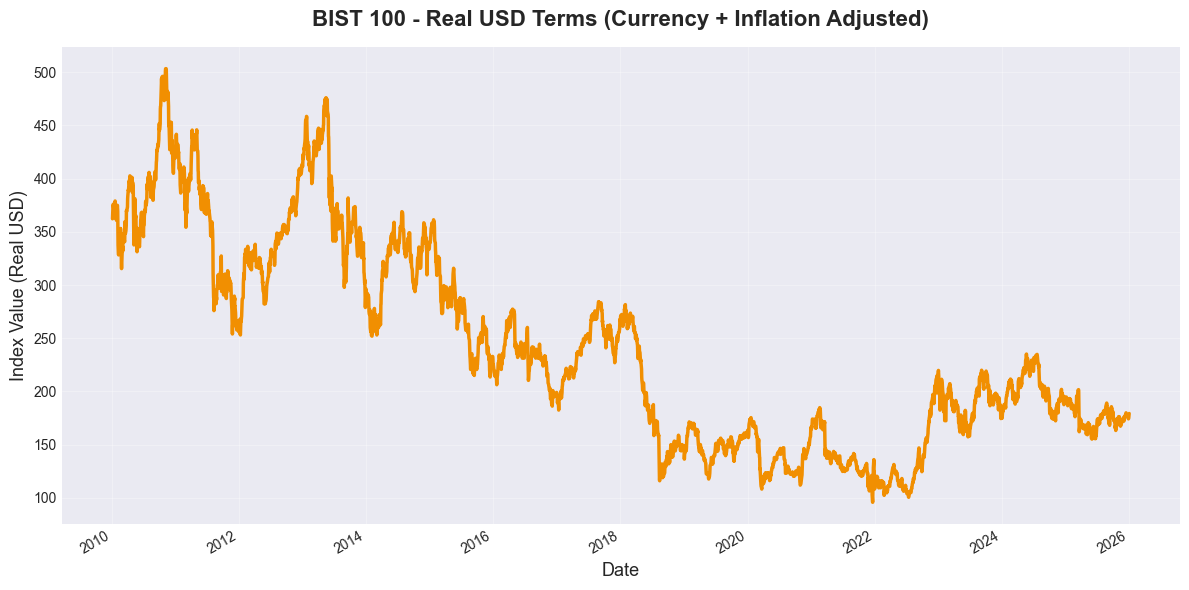

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
df['BIST_USD_Real'].plot(ax=ax, color='#F18F01', linewidth=2.5)
ax.set_title('BIST 100 - Real USD Terms (Currency + Inflation Adjusted)', fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Index Value (Real USD)', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/bist_real_usd_terms.png', dpi=300, bbox_inches='tight')
plt.show()